# Question 4: Non-linear dimension reduction:
[a]. Visualize the data from the file DataKPCA.csv. 
[b]. Train KPCA.
[c]. Plot the variance explained versus KPCA dimensions for up to 10 dimensions.

## a. Visualize the data from the file DataKPCA.csv 

In [17]:
#importing numpy, pandas, matplot, seaborn libreries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload() #uploading file from local storage
for fn in uploaded.keys():
  print('file uploaded is "{name}" '.format(name=fn))

Saving DataKPCA.csv to DataKPCA (2).csv
file uploaded is "DataKPCA.csv" 


In [22]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

from sklearn.decomposition import KernelPCA #decomposing multivariate dataset into simgular values
df_KPCA = pd.read_csv("DataKPCA.csv") #reading and displaying Principal component Analysis file
display(df_KPCA)

,x1,x2,x3,x4,x5,x6,x7
0,2.596641,15.263178,-46.289607,-10.993265,-2.266729,1.935832,2.039688
1,3.096286,14.784802,-48.175614,-8.799362,-2.220871,1.851201,1.921974
2,3.360246,14.774917,-49.471841,-9.030501,-1.760447,1.753114,2.041933
3,2.214819,15.027394,-43.200400,-13.565001,-2.643018,2.200463,2.141847
4,3.398576,15.115756,-49.416644,-6.857672,-2.025936,1.788085,1.875540
...,...,...,...,...,...,...,...
185,2.647090,14.246231,-44.947807,-10.412540,-2.809695,2.084152,1.903990
186,2.677908,14.620351,-45.776334,-10.196029,-2.640178,2.038005,1.910832
187,3.543866,14.487241,-49.692284,-7.773038,-1.865513,1.752195,1.952922
188,3.563404,13.945495,-49.131439,-8.156546,-2.104684,1.773425,1.914397


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f501d8c0090>,
      dtype=object)

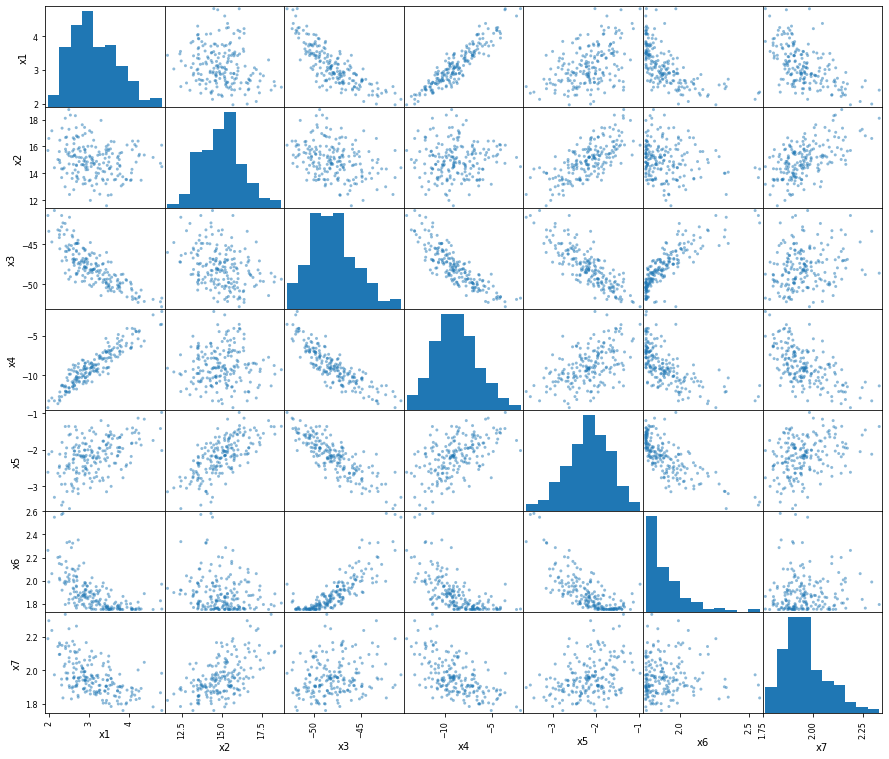

In [26]:
#https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html
#https://in.mathworks.com/matlabcentral/answers/1451634-scatter-plot-data-that-meet-a-condition
pd.plotting.scatter_matrix(df_KPCA, alpha=0.5, figsize= (15, 13)) #plotting scalar matrices

## b. Train KPCA.

In [48]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html
#http://rasbt.github.io/mlxtend/user_guide/feature_extraction/RBFKernelPCA/
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True,n_components=10, gamma=10) # using rbf kernal, we ae training 10 components
X_kpca = kpca.fit_transform(df_KPCA) #Fitting transformed Kernel Principal Component 
X_kpca_reconst = kpca.inverse_transform(X_kpca)
#reconstructing above given kpca
kpca.fit(X_kpca_reconst)
kpca.fit(X_kpca)



KernelPCA(fit_inverse_transform=True, gamma=10, kernel='rbf', n_components=10)

In [49]:
df_KPCA.describe() # getting information about  each column, like mean value. std - The standard deviation

,x1,x2,x3,x4,x5,x6,x7
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,3.121555,14.985682,-47.909555,-8.811677,-2.175834,1.893953,1.958302
std,0.589013,1.298751,2.459375,2.337179,0.505819,0.159647,0.108756
min,1.964315,11.577329,-52.837231,-14.068488,-3.613443,1.750006,1.761394
25%,2.679532,14.087484,-49.736194,-10.392405,-2.512570,1.773690,1.880257
50%,3.039420,14.943396,-48.185549,-9.045948,-2.156469,1.852369,1.942348
75%,3.489341,15.764749,-46.405402,-7.235609,-1.828925,1.954614,2.018826
max,4.820967,18.747792,-40.772554,-1.907331,-0.972995,2.580983,2.332842


## C. Plot the variance explained versus KPCA dimensions for up to 10 dimensions

In [43]:
#https://plotly.com/python/plotly-express/
import plotly.express as px #for creating entire figures/graphs at once
#https://stackoverflow.com/questions/32857029/python-scikit-learn-pca-explained-variance-ratio-cutoff
v_xp = np.cumsum(pca.explained_variance_ratio_) # variance, with cumulative sum
px.area(x=range(1, v_xp.shape[0] + 1), y=v_xp, labels={"x": "dimensions of PCA ", "y": "Variance Explained "}) # to show stacked are in polyline form

x1    0.345110
x2    1.677877
x3    6.016689
x4    5.433655
x5    0.254506
x6    0.025353
x7    0.011766
dtype: float64


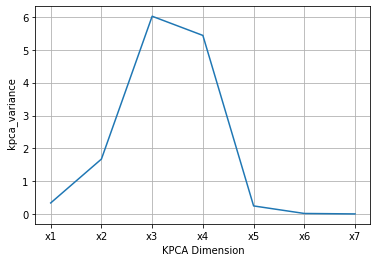

In [51]:
kpca_variance = np.var(df_KPCA, axis=0) #finding variance
print(kpca_variance) # print variance of kpca
# https://vitalflux.com/pca-explained-variance-concept-python-example/#:~:text=explained_variance_ratio_%20method%20of%20PCA%20is,scaled%20before%20applying%20PCA%20technique.
plt.plot(kpca_variance)   #Plot of variance and number of components
plt.grid() 
plt.xlabel('KPCA Dimension') #showing x label of graph
plt.ylabel(' kpca_variance')  #showing Y label of variance graph
plt.show() #ploting dimension vs kpca variance


## Observation and conclusion: 
we have decomposed multivariate data into singular values and plotted scaler matrix with value of alpha0.5 and size of figure as 15*13. after that, using rbf kernal, we trainined 10 components fitted them into new KPCA format. after getting new table we seen data tendency like mean, median and deviation. further ploted variance vs KPCA graph, that started converging to 1 after 3 KPCA dimension. then we found variance of KPCA and showing them in graph of KPCA variance and dimension, in which we observed that variance increased upto 3 dimension and then it started decreasing and nullified up to 7th dimension.





## Reference
https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html
https://in.mathworks.com/matlabcentral/answers/1451634-scatter-plot-data-that-meet-a-condition
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html
http://rasbt.github.io/mlxtend/user_guide/feature_extraction/RBFKernelPCA/
https://plotly.com/python/plotly-express/
https://stackoverflow.com/questions/32857029/python-scikit-learn-pca-explained-variance-ratio-cutoff
https://vitalflux.com/pca-explained-variance-concept-python-example/#:~:text=explained_variance_ratio_%20method%20of%20PCA%20is,scaled%20before%20applying%20PCA%20technique.


NOTE: We have discussed this question with our classmate Ambadas Maske and Harshit Agrawal